In [58]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

$$\frac{dN}{dt}=r\left(1-\frac{N}{K}\right)N$$

In [3]:
help(odeint)

Help on function odeint in module scipy.integrate._odepack_py:

odeint(func, y0, t, args=(), Dfun=None, col_deriv=0, full_output=0, ml=None, mu=None, rtol=None, atol=None, tcrit=None, h0=0.0, hmax=0.0, hmin=0.0, ixpr=0, mxstep=0, mxhnil=0, mxordn=12, mxords=5, printmessg=0, tfirst=False)
    Integrate a system of ordinary differential equations.
    
    .. note:: For new code, use `scipy.integrate.solve_ivp` to solve a
              differential equation.
    
    Solve a system of ordinary differential equations using lsoda from the
    FORTRAN library odepack.
    
    Solves the initial value problem for stiff or non-stiff systems
    of first order ode-s::
    
        dy/dt = func(y, t, ...)  [or func(t, y, ...)]
    
    where y can be a vector.
    
    .. note:: By default, the required order of the first two arguments of
              `func` are in the opposite order of the arguments in the system
              definition function used by the `scipy.integrate.ode` class and
 

In [4]:
def growth_model(N, t, r, K):
    return r * N * (1 - N / K)

In [27]:
t = np.linspace(0, 10, 100)
N0 = 1
r = 1
K = 10

N0 = odeint(growth_model, N0, t, args=(r, K))
N1 = odeint(growth_model, 15, t, args=(r, K))

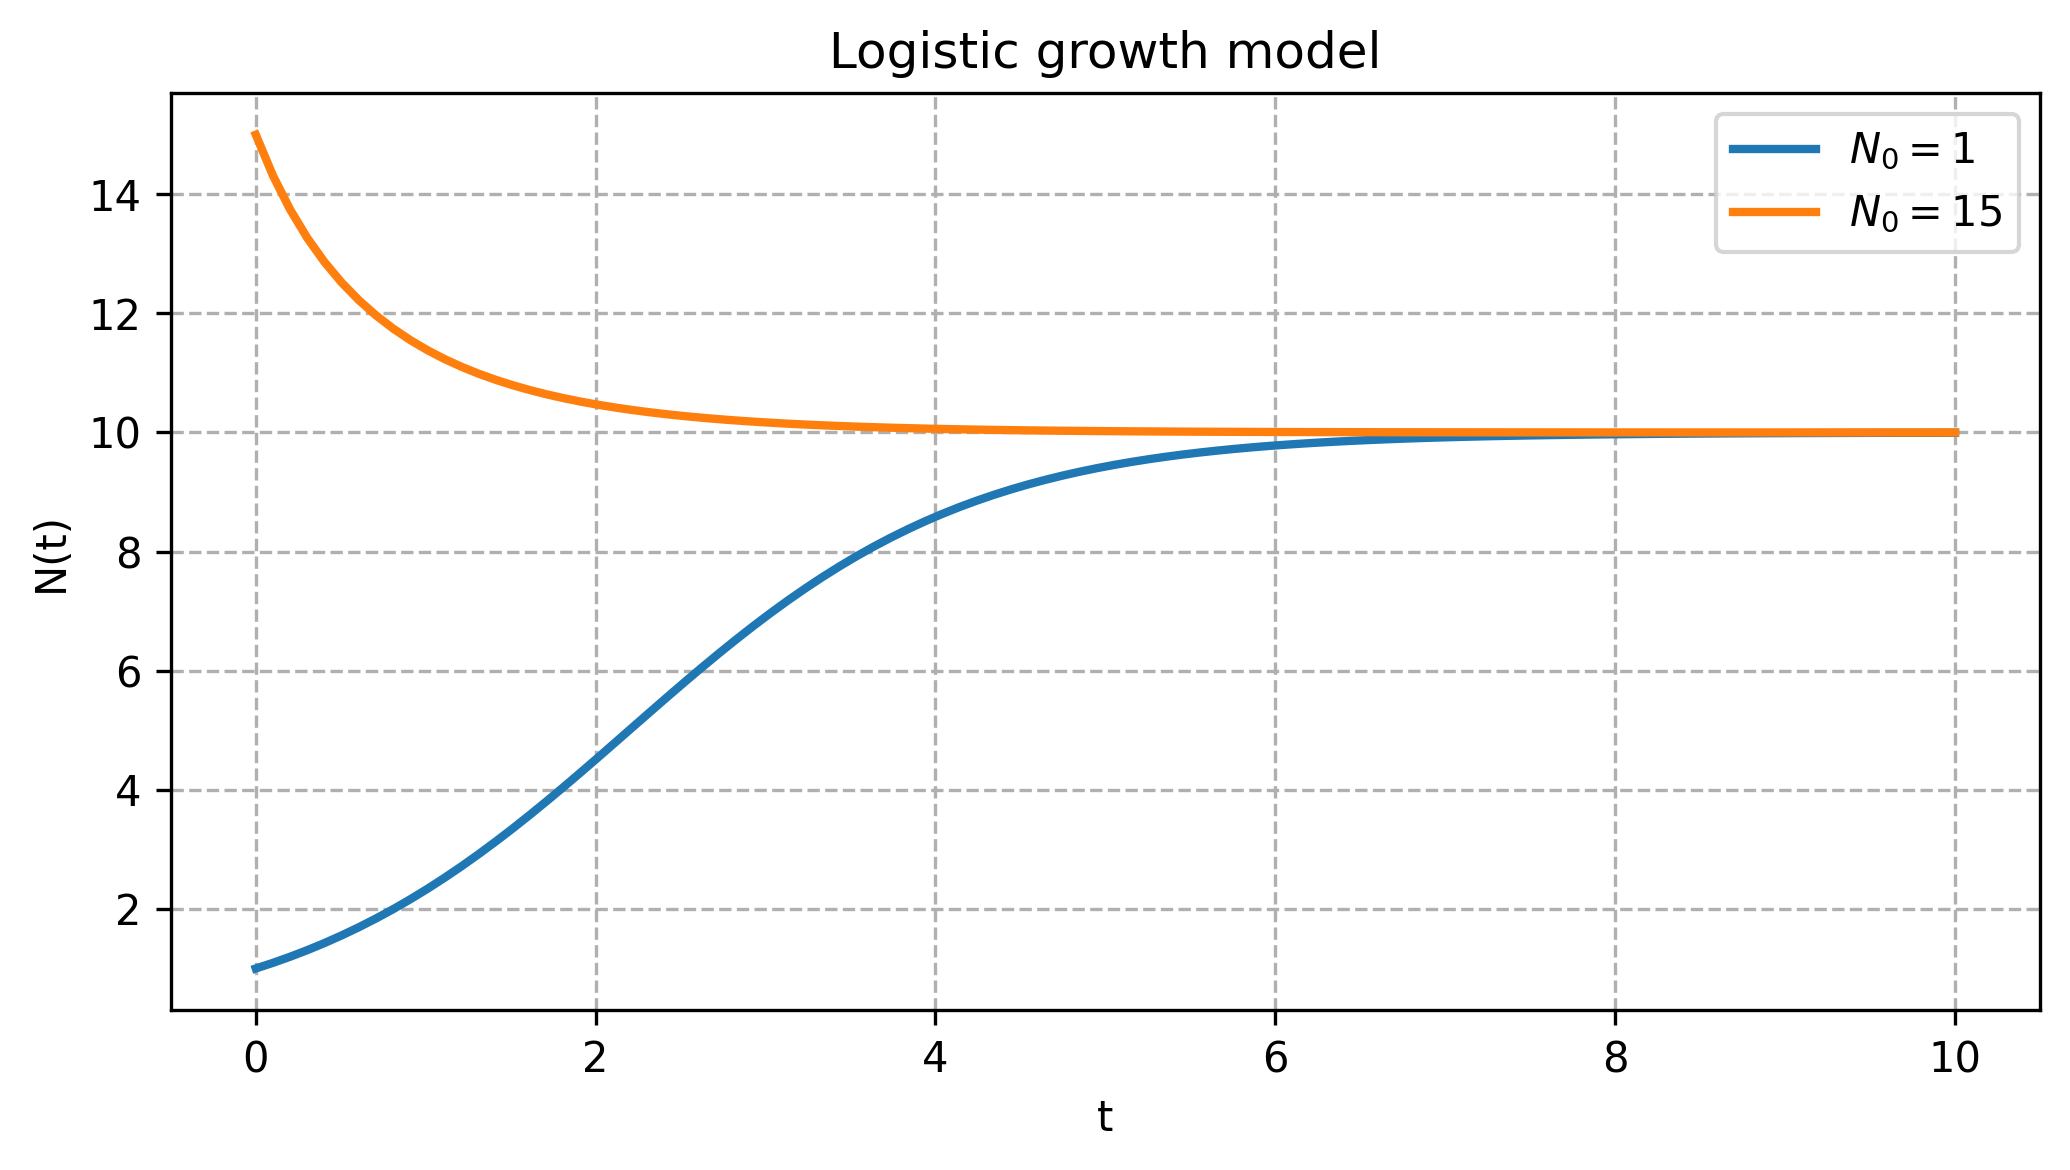

In [47]:
plt.figure(figsize=(7, 4), dpi=300)
plt.plot(t, N0, lw=2, label='$N_0=1$')
plt.plot(t, N1, lw=2, label='$N_0=15$')
plt.xlabel('t')
plt.ylabel('N(t)')
plt.title('Logistic growth model')
plt.grid(linestyle='--')
plt.legend()
plt.tight_layout()
plt.savefig('logistic_growth_model.png')
plt.savefig('logistic_growth_model.pdf')

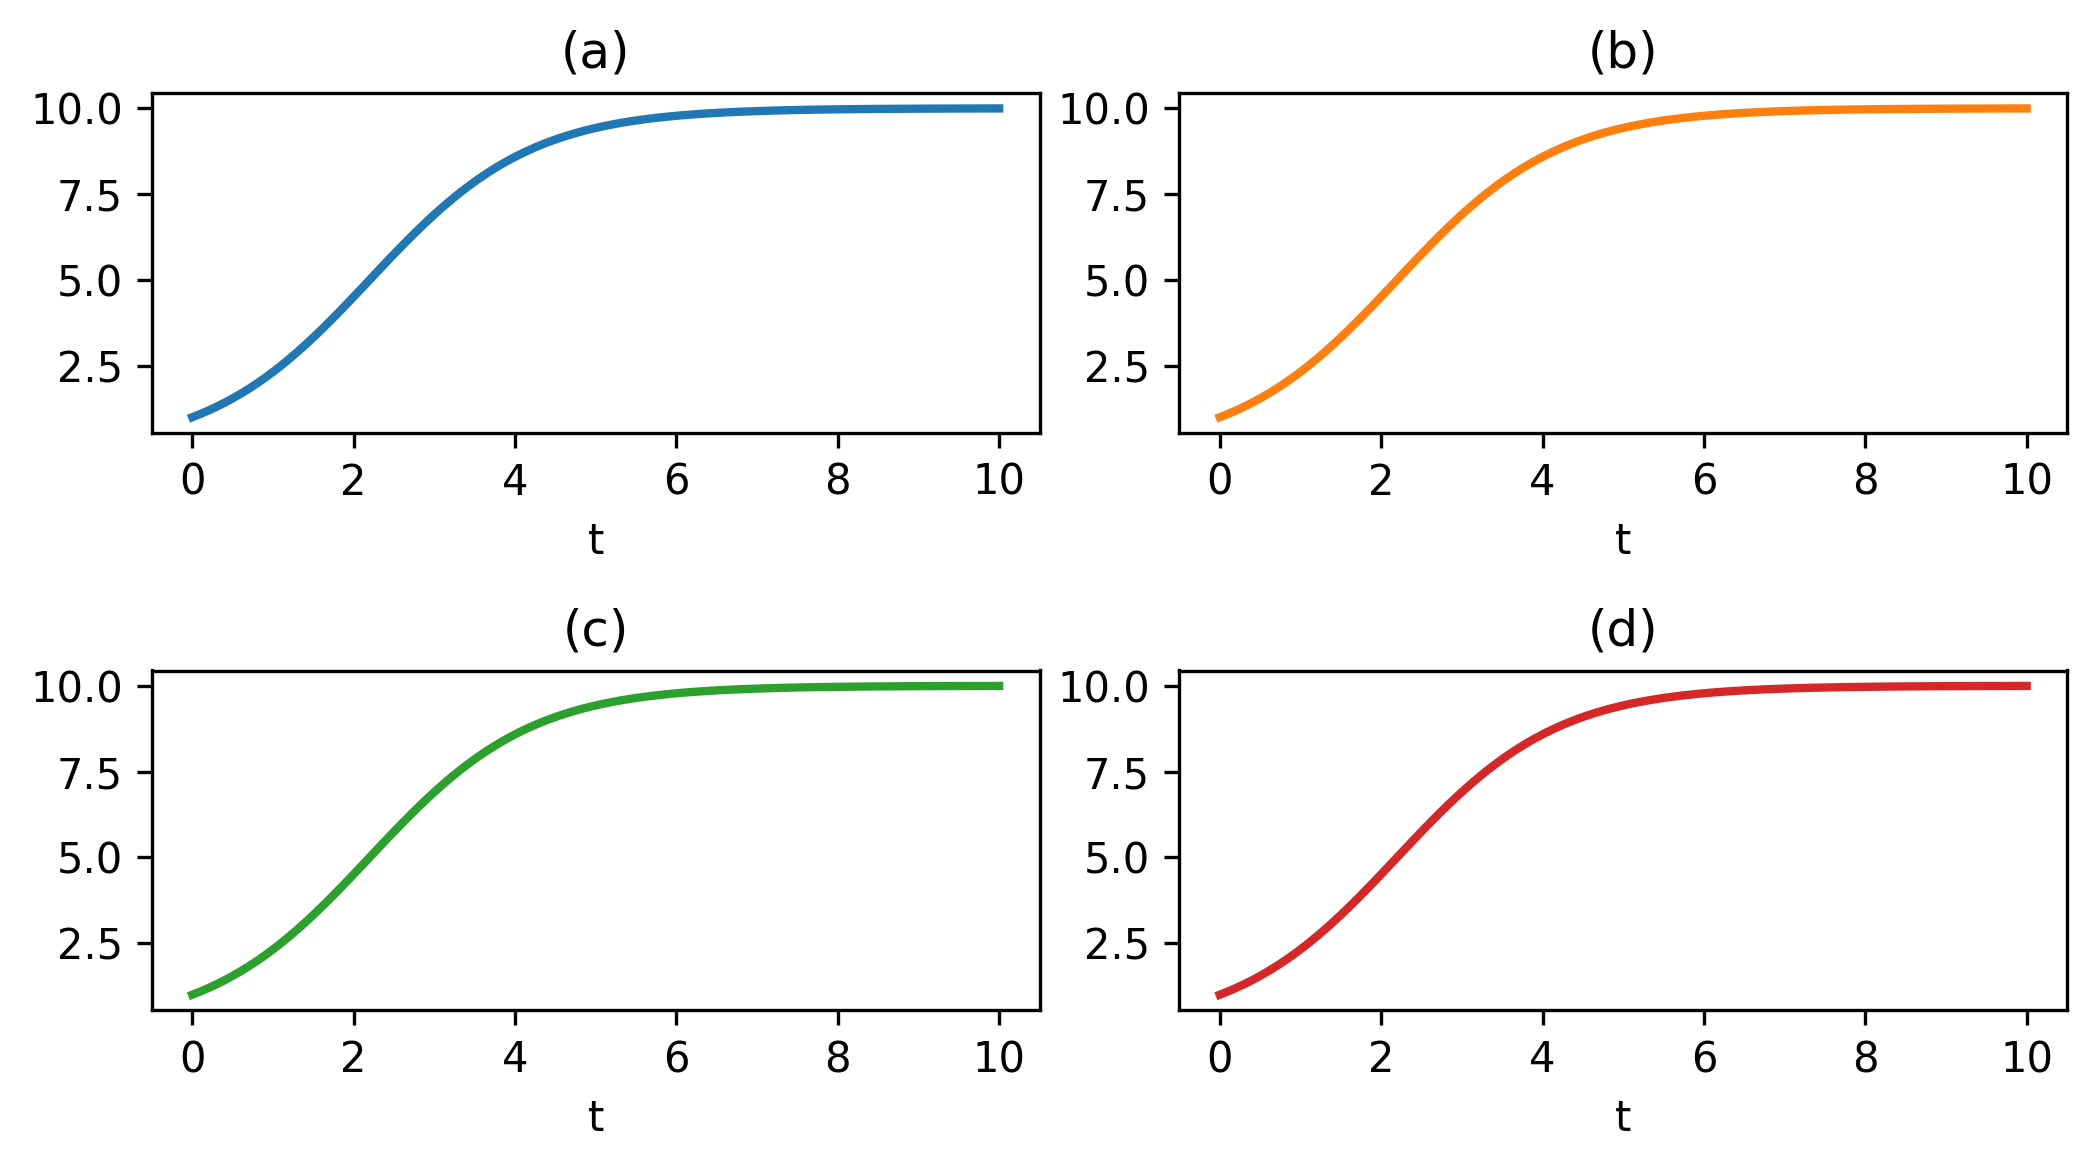

In [51]:
plt.figure(figsize=(7, 4), dpi=300)

plt.subplot(221)
plt.plot(t, N0, 'C0',lw=2)
plt.title('(a)')
plt.xlabel('t')

plt.subplot(222)
plt.plot(t, N0, 'C1', lw=2)
plt.title('(b)')
plt.xlabel('t')

plt.subplot(223)
plt.plot(t, N0, 'C2', lw=2)
plt.title('(c)')
plt.xlabel('t')

plt.subplot(224)
plt.plot(t, N0, 'C3', lw=2)
plt.title('(d)')
plt.xlabel('t')

plt.tight_layout()

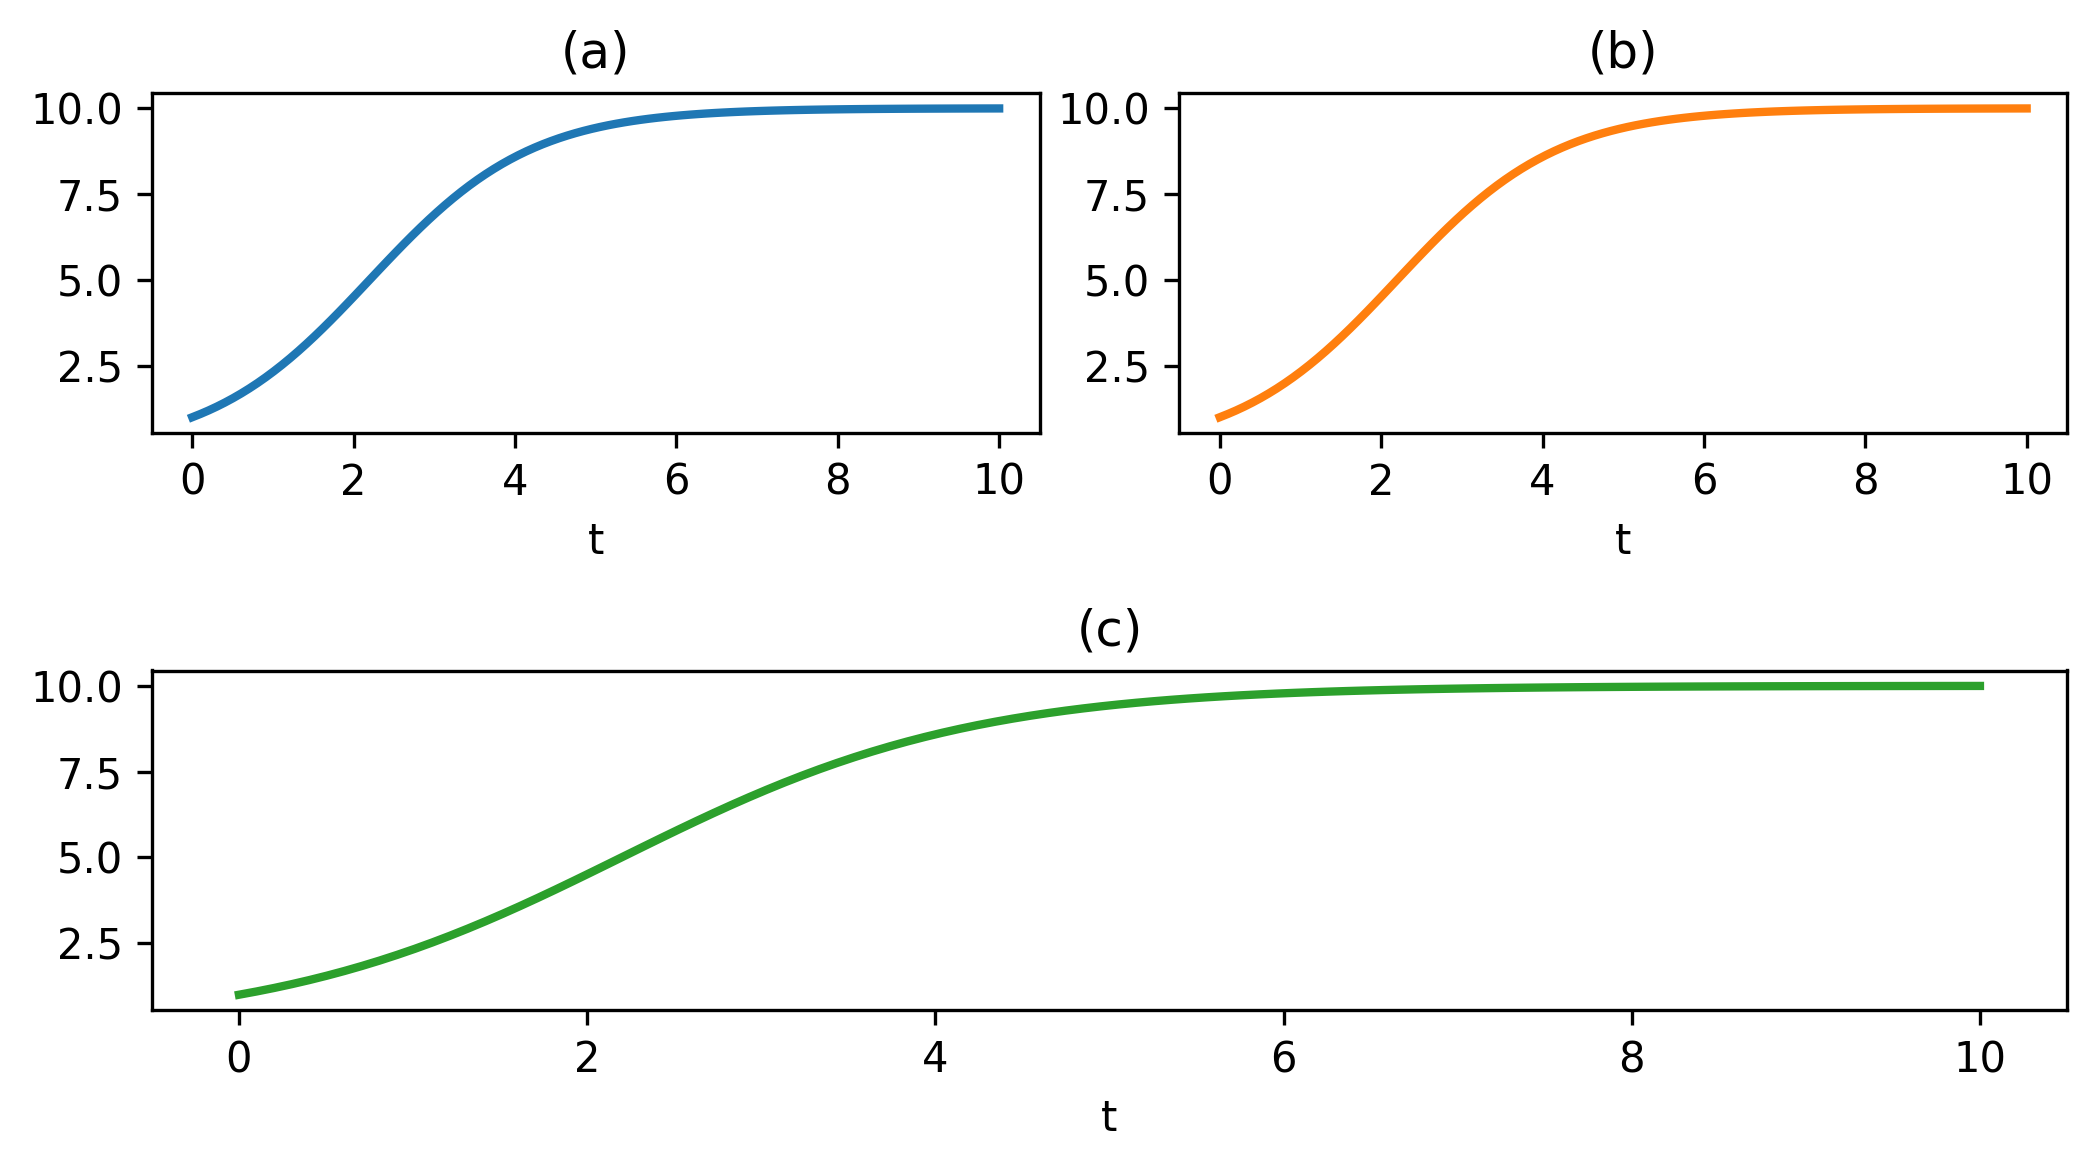

In [53]:
plt.figure(figsize=(7, 4), dpi=300)

plt.subplot(221)
plt.plot(t, N0, 'C0',lw=2)
plt.title('(a)')
plt.xlabel('t')

plt.subplot(222)
plt.plot(t, N0, 'C1', lw=2)
plt.title('(b)')
plt.xlabel('t')

plt.subplot(212)
plt.plot(t, N0, 'C2', lw=2)
plt.title('(c)')
plt.xlabel('t')

plt.tight_layout()

Text(0.5, 1.0, '(a)')

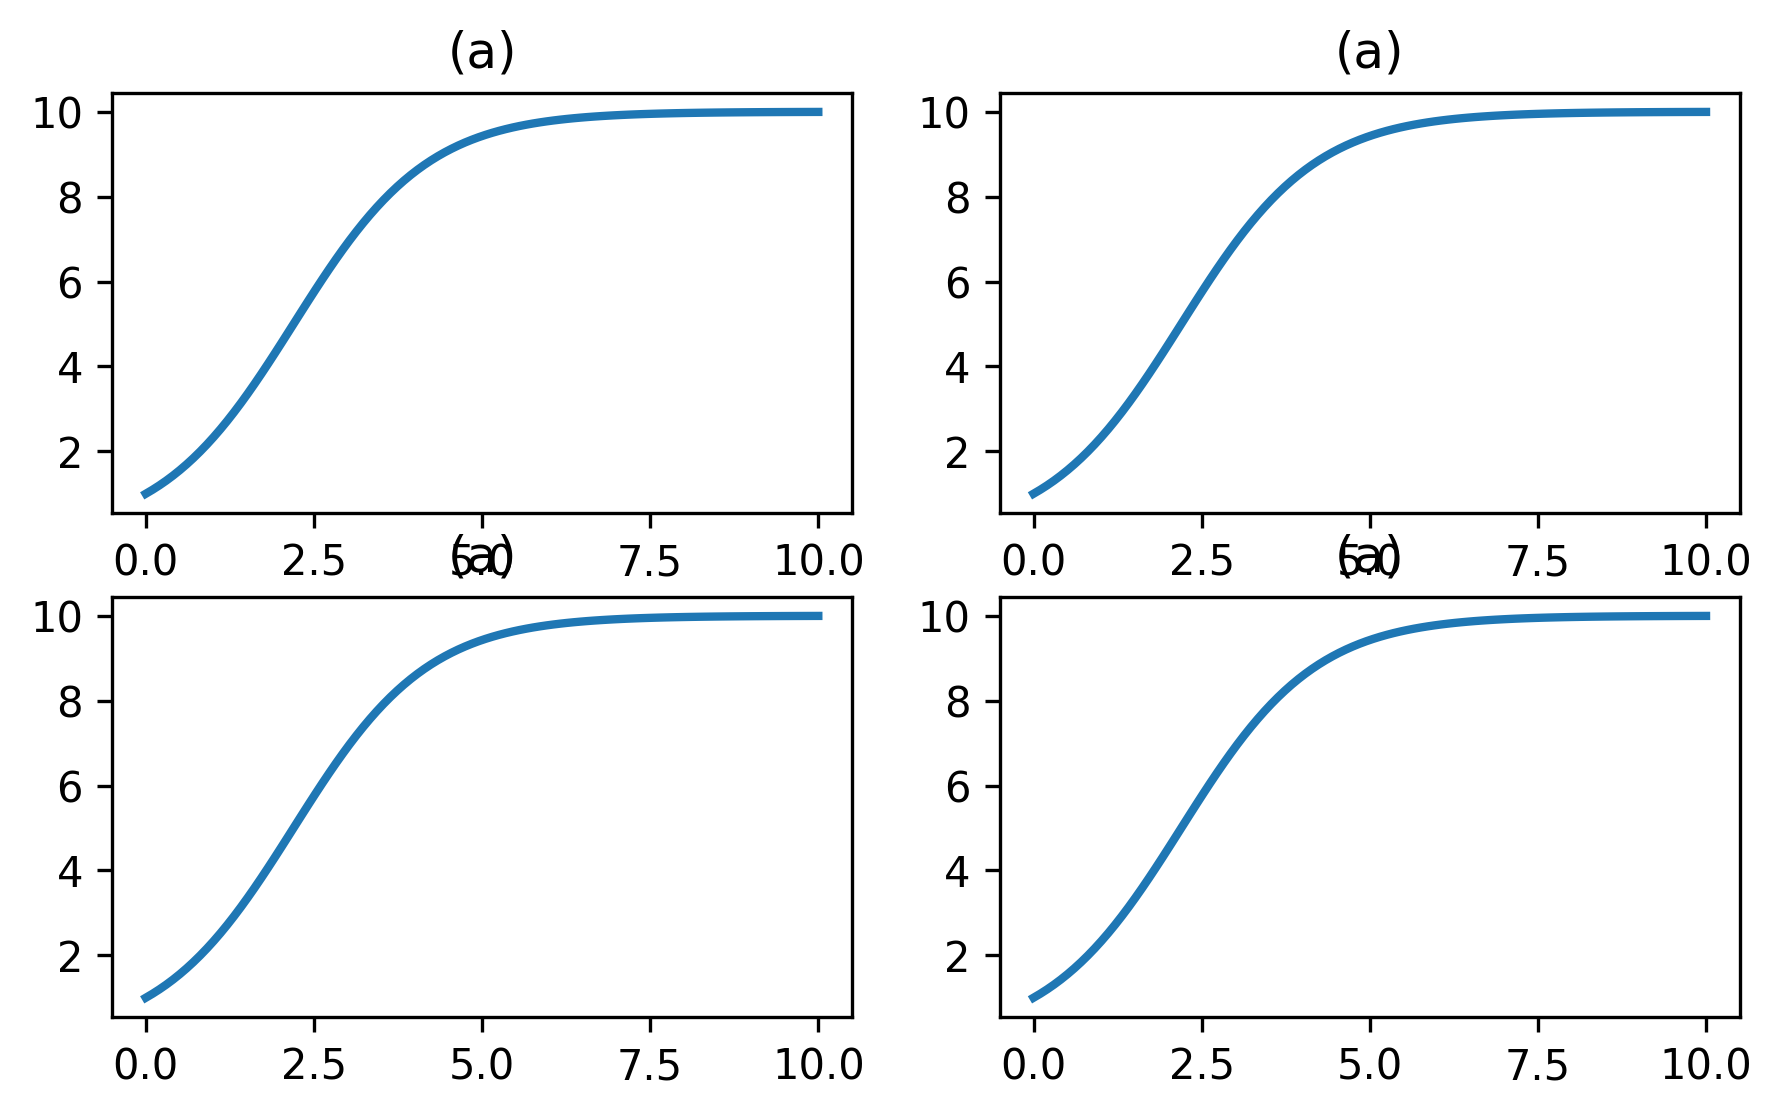

In [55]:
plt.figure(figsize=(7, 4), dpi=300)

ax = plt.subplot(221)
ax.plot(t, N0, 'C0',lw=2)
ax.set_title('(a)')

ax = plt.subplot(222)
ax.plot(t, N0, 'C0',lw=2)
ax.set_title('(a)')

ax = plt.subplot(223)
ax.plot(t, N0, 'C0',lw=2)
ax.set_title('(a)')

ax = plt.subplot(224)
ax.plot(t, N0, 'C0',lw=2)
ax.set_title('(a)')

In [62]:
fig = plt.figure(figsize=(7, 4))
fig.set_tight_layout(True)

ax = plt.subplot()
line, = ax.plot([], [], 'C0--', lw=2)
ax.set_xlim(0, 10)
ax.set_ylim(0, 15)

plt.close()

def animation_frame(i):
    line.set_data(t[:i], N0[:i])
    return line,

ani = FuncAnimation(fig, animation_frame, frames=len(t), interval=40, blit=True)
HTML(ani.to_jshtml())

In [66]:
fig = plt.figure(figsize=(7, 4))
fig.set_tight_layout(True)

ax = plt.subplot(211)
line1, = ax.plot([], [], 'C0--', lw=2)
points1, = ax.plot([], [], 'C0o', lw=2)
ax.set_xlim(0, 10)
ax.set_ylim(0, 15)

ax = plt.subplot(212)
line2, = ax.plot([], [], 'C0--', lw=2)
ax.set_xlim(0, 10)
ax.set_ylim(0, 15)

plt.close()

def animation_frame(i):
    line1.set_data(t[:i], N0[:i])
    points1.set_data([t[i]], [N0[i]])
    line2.set_data(t[:i], N1[:i])
    return line1, line2, points1

ani = FuncAnimation(fig, animation_frame, frames=len(t), interval=40, blit=True)
#HTML(ani.to_jshtml())
ani.save('logistic_growth_model.gif', writer='imagemagick', fps=25)

MovieWriter imagemagick unavailable; using Pillow instead.
